<a href="https://colab.research.google.com/github/ProtyushRoy/ML-Assignment_ISTE/blob/main/ML_ISTE_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

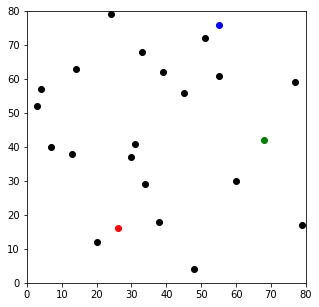

In [5]:
#Question1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x':[60,7,3,38,13,30,39,33,51,77,79,31,34,48,4,55,20,45,14,24],
    'y':[30,40,52,18,38,37,62,68,72,59,17,41,29,4,57,61,12,56,63,79]
})
np.random.seed(200)
k = 3
centroids = {
    i+1: [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}

fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color = 'k')
colmap = {1: 'r', 2:'g', 3:'b'}
for i in centroids.keys():
  plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  60  30        36.769553        14.422205        46.270941        2     g
1   7  40        30.610456        61.032778        60.000000        1     r
2   3  52        42.720019        65.764732        57.271284        1     r
3  38  18        12.165525        38.418745        60.440053        1     r
4  13  38        25.553865        55.145263        56.639209        1     r


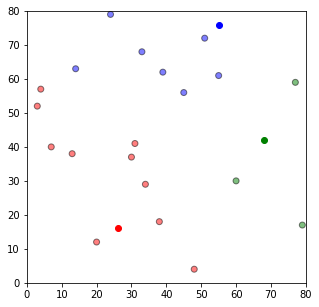

In [6]:
def assignment(df, centroids):
  for i in centroids.keys():
    df['distance_from_{}'.format(i)] = (
        np.sqrt(
            (df['x'] - centroids[i][0])**2 + (df['y']-centroids[i][1])**2) )
  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

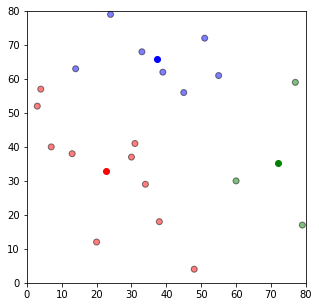

In [7]:
# UPDATE

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
    centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
  return k

centroids = update(centroids)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()




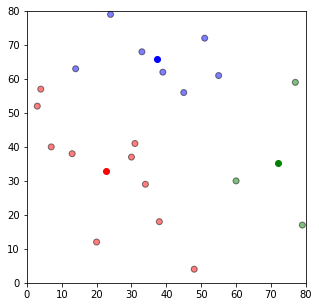

In [8]:
# REPEAT ASSIGNMENT STAGE

df = assignment(df,centroids)

#flotting results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

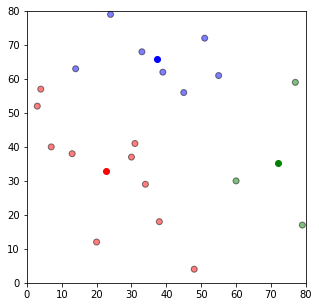

In [9]:
# CONTINUE UNTILL THERE IS NO CHANGE IN O/P
while True:
  closest_centroids = df['closest'].copy(deep = True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


In [11]:
# Using skikit learn, K-Means Clustering:
from sklearn.cluster import KMeans
df = pd.DataFrame({
    'x':[60,7,3,38,13,30,39,33,51,77,79,31,34,48,4,55,20,45,14,24],
    'y':[30,40,52,18,38,37,62,68,72,59,17,41,29,4,57,61,12,56,63,79]
})
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

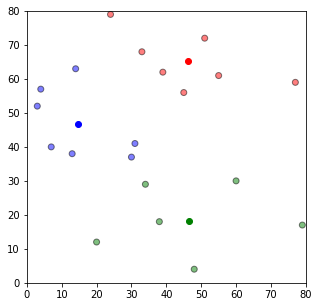

In [12]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'],df['y'], color=colors1,alpha=0.5, edgecolor='k')
for idx,centroid in enumerate(centroids):
  plt.scatter(*centroid,color=colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [3]:
#Question2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
df=pd.read_csv('/gdrive/My Drive/Copy of Mall_Customers.csv')
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.drop(columns = ['CustomerID','Gender'], inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


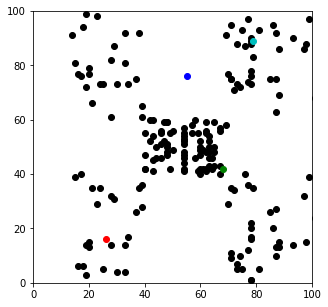

In [19]:
#Initializing
np.random.seed(200)
k = 5
centroids = {
    i+1: [np.random.randint(0,100), np.random.randint(0,100)]
    for i in range(k)
}

fig = plt.figure(figsize = (5,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color = 'k')
colmap = {1: 'r', 2:'g', 3:'b',  4:'c', 5:'k'}
for i in centroids.keys():
  plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()



   Age  Annual Income (k$)  ...  closest  color
0   19                  15  ...        1      r
1   21                  15  ...        5      k
2   20                  16  ...        1      r
3   23                  16  ...        5      k
4   31                  17  ...        1      r

[5 rows x 10 columns]


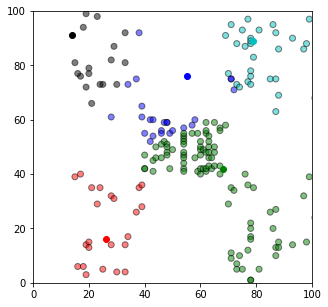

In [21]:
def assignment(df, centroids):
  for i in centroids.keys():
    df['distance_from_{}'.format(i)] = (
        np.sqrt(
            (df['Annual Income (k$)'] - centroids[i][0])**2 + (df['Spending Score (1-100)']-centroids[i][1])**2) )
  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

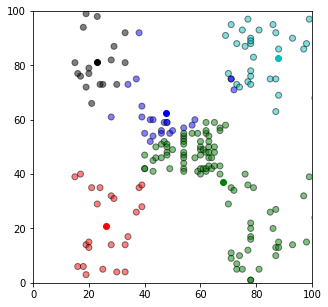

In [22]:
#Update
import copy
old_centroids = copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['closest'] == i]['Annual Income (k$)'])
    centroids[i][1] = np.mean(df[df['closest'] == i]['Spending Score (1-100)'])
  return k

centroids = update(centroids)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()



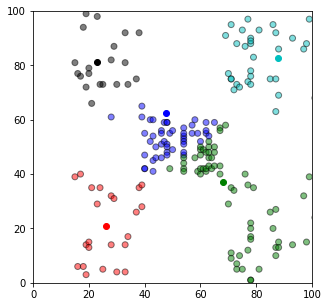

In [23]:
# Repeating the assignment stage

df = assignment(df,centroids)

#flotting results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

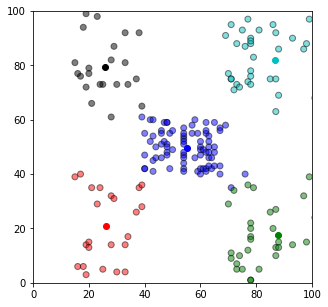

In [24]:
# continue until there is no change in O/P
while True:
  closest_centroids = df['closest'].copy(deep = True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break
fig = plt.figure(figsize=(5,5))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [28]:
# Using skikit learn, K-Means Clustering:
df=pd.read_csv('/gdrive/My Drive/Copy of Mall_Customers.csv')
df.drop(columns = ['CustomerID','Gender','Age'], inplace=True)



from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

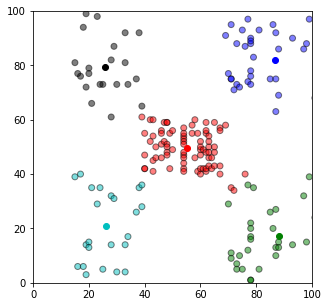

In [31]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], color=colors1,alpha=0.5, edgecolor='k')
for idx,centroid in enumerate(centroids):
  plt.scatter(*centroid,color=colmap[idx+1])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()